link of drive having the data of the Models :
https://drive.google.com/drive/folders/1BfyNuFvyiSvoZj1fKKQHNmobA3RkYp-k?usp=sharing

You need to make a shortcut in your drive to let the notebook work correctly

# **Imports**

---



In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.lib.display import Audio
import wave
import contextlib
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch import tensor
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

# **Connecting to drive**

---



In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#**Loading dataset & putting it panda dataframe**

---



In [ ]:
path = "/content/gdrive/MyDrive/Crema/"
directory_list = os.listdir(path)

emotions = []
paths = []

for file in directory_list:
    paths.append(path + file)
    emotion=file.split('_')
    if emotion[2] == 'SAD':
       emotions.append('sadness')
    elif emotion[2] == 'ANG':
        emotions.append('angry')
    elif emotion[2] == 'DIS':
        emotions.append('disgust')
    elif emotion[2] == 'FEA':
        emotions.append('fear')
    elif emotion[2] == 'HAP':
        emotions.append('happy')
    elif emotion[2] == 'NEU':
        emotions.append('neutral')

emotion_df = pd.DataFrame(emotions, columns=['Emotions'])

path_df = pd.DataFrame(paths, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,/content/gdrive/MyDrive/Crema/1080_DFA_ANG_XX.wav
1,disgust,/content/gdrive/MyDrive/Crema/1079_WSI_DIS_XX.wav
2,disgust,/content/gdrive/MyDrive/Crema/1080_IEO_DIS_LO.wav
3,angry,/content/gdrive/MyDrive/Crema/1079_WSI_ANG_XX.wav
4,disgust,/content/gdrive/MyDrive/Crema/1080_IEO_DIS_HI.wav


### **Histogram for emotions** 

---


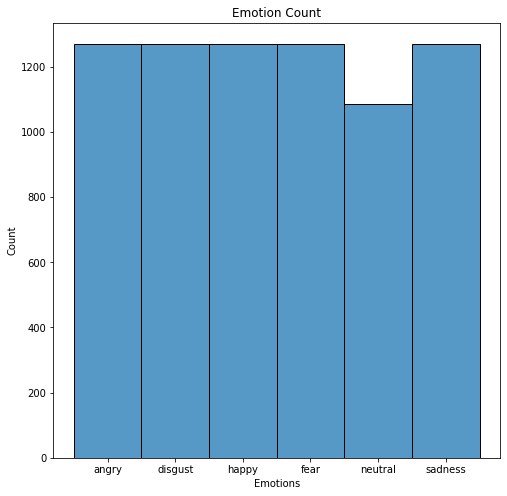

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Emotion Count")
plt.xlabel('Emotions')
plt.ylabel('Count')
sns.histplot(Crema_df.Emotions)


In [ ]:
Crema_df.head()

,Emotions,Path
0,angry,/content/gdrive/MyDrive/Crema/1080_DFA_ANG_XX.wav
1,disgust,/content/gdrive/MyDrive/Crema/1079_WSI_DIS_XX.wav
2,disgust,/content/gdrive/MyDrive/Crema/1080_IEO_DIS_LO.wav
3,angry,/content/gdrive/MyDrive/Crema/1079_WSI_ANG_XX.wav
4,disgust,/content/gdrive/MyDrive/Crema/1080_IEO_DIS_HI.wav


# **loading audio , listening to each calss & plotting the waveform**

---



In [ ]:
def plotting_waveform(emotion):
  path = np.array(Crema_df.Path[Crema_df.Emotions==emotion])[0]
  audio, sample_rate = librosa.load(path)
  plt.figure()
  plt.title("Plotting the waveform of the audio with {} emotion".format(emotion))
  librosa.display.waveplot(audio,sr=sample_rate)
  plt.show
  return path

In [ ]:
emotions_list=['sadness','angry','disgust','fear','happy','neutral']

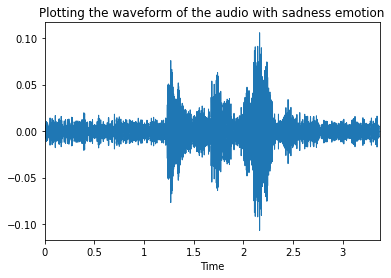

In [ ]:
#sadness
path=plotting_waveform(emotions_list[0])
Audio(path)

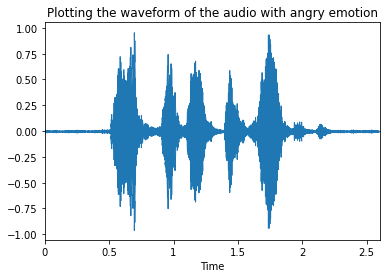

In [ ]:
#angry
path=plotting_waveform(emotions_list[1])
Audio(path)

Exception ignored in: <function Wave_write.__del__ at 0x7f3d5b931a70>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 465, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified
Exception ignored in: <function Wave_write.__del__ at 0x7f3d5b931a70>
Traceback (most recent call last):
  File "/usr/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/usr/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/usr/lib/python3.7/wave.py", line 465, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


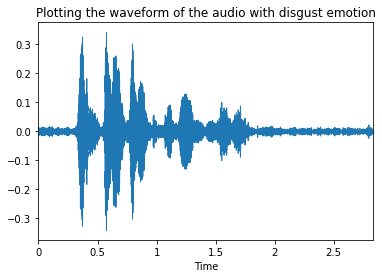

In [ ]:
#disgust
path=plotting_waveform(emotions_list[2])
Audio(path)

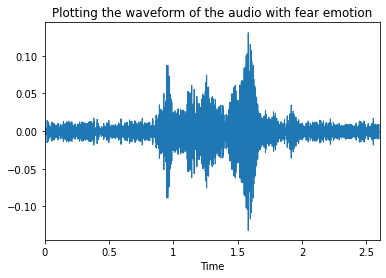

In [ ]:
#fear
path=plotting_waveform(emotions_list[3])
Audio(path)

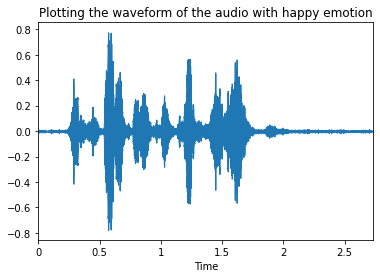

In [ ]:
#happy
path=plotting_waveform(emotions_list[4])
Audio(path)

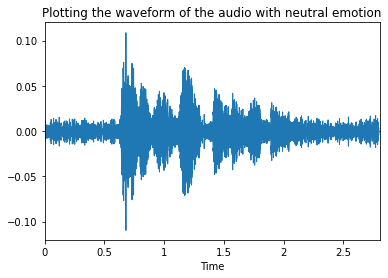

In [ ]:
#neutral
path=plotting_waveform(emotions_list[5])
Audio(path)

# **Labels map**

---



In [ ]:
labels_map = {
    "sadness":0,
    "angry":1,
    "disgust":2,
    "fear":3,
    "happy":4,
    "neutral":5
}

In [ ]:
for i in range(0,len(Crema_df.Emotions)):
  Crema_df.Emotions[i] = labels_map[Crema_df.Emotions[i]]

In [ ]:
print(Crema_df.shape)

(7442, 2)


# **Calculating Duration**

---



In [ ]:
def calc_duration(fname):
  with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    return duration

In [ ]:
path = "/content/gdrive/MyDrive/Crema/"
directory_list = os.listdir(path)

duration = []
emotions = []
paths = []
i=0
for file in directory_list:
    paths.append(path + file)
    song_duration=calc_duration(paths[i])
    duration.append(song_duration)
    i+=1
duration_df = pd.DataFrame(duration, columns=['Duration'])

path_df = pd.DataFrame(paths, columns=['Path'])
song_df = pd.concat([duration_df, path_df], axis=1)
song_df.head()

,Duration,Path
0,2.602625,/content/gdrive/MyDrive/Crema/1080_DFA_ANG_XX.wav
1,2.836187,/content/gdrive/MyDrive/Crema/1079_WSI_DIS_XX.wav
2,2.669313,/content/gdrive/MyDrive/Crema/1080_IEO_DIS_LO.wav
3,2.836187,/content/gdrive/MyDrive/Crema/1079_WSI_ANG_XX.wav
4,2.902875,/content/gdrive/MyDrive/Crema/1080_IEO_DIS_HI.wav


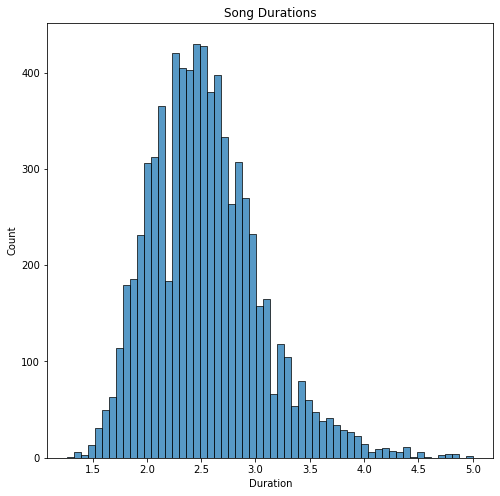

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Song Durations")
plt.xlabel('Duration')
plt.ylabel('Count')
sns.histplot(song_df.Duration)

# **Printing accuracy & classification Report**

---



In [ ]:
def printing_accuracy_classification_report(labels,pred,loss,flag,print_flag=0):

  emotions_class=['sadness','angry','disgust','fear','happy','neutral']

  if (flag==0):
    print("Train:")
  elif(flag==1):
    print("Validation:")
  else:
    print("test:") 
  print("loss",loss)
  accuracy=accuracy_score(labels,pred)
  print("accuracy:",accuracy)
  if(print_flag==1):
    print(classification_report(labels,pred,target_names=emotions_class))
  print("----------------------------------------------------------------")
  return accuracy

# **1D Model**

---



### Features

In [ ]:
def get_features_1d(audio_data,sample_rate):
  #default values
  frame_length=2048
  hop_length=512
  energy=np.mean([np.sum(np.power(np.abs(audio_data[hop:hop+frame_length]), 2)) for hop in range(0, audio_data.shape[0], hop_length)])
  zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio_data).T, axis=0)
  return energy,zcr[0]

In [ ]:
def fix_audio_size(audio):
  standard_size=4*22050
  zeros_count=standard_size-len(audio)
  if zeros_count<0:
    #del audio[standard_size:]
    return audio[:standard_size]
  audio=np.append(audio,np.zeros(zeros_count))
  return audio

In [ ]:
audio_data=[]
for j in range(0,len(Crema_df.Path)):
    temp_audio, sample_rate = librosa.load(Crema_df.Path[j])
    audio=fix_audio_size(temp_audio)
    energy,zcr=get_features_1d(audio,sample_rate)
    audio = np.append(audio,energy)
    audio = np.append(audio,zcr)
    audio_data.append(audio)
audio_data=np.array(audio_data)

### Saving 1D feauters Array & Labels in drive

In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/1DFeatures.npy',audio_data)

In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/1DLabels.npy',np.array(Crema_df.Emotions))

### Loading the Features & Labels from drive

In [ ]:
data = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/1DFeatures.npy',allow_pickle=True)

In [ ]:
labels = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/1DLabels.npy',allow_pickle=True)

###Splitting Data


In [ ]:
data_temp, data_test, labels_temp, labels_test = train_test_split(data,labels, test_size=0.3, random_state=1 , stratify = labels)

In [ ]:
del labels
del data

In [ ]:
data_train, data_validation, labels_train, labels_validation = train_test_split(data_temp,labels_temp, test_size=0.05, random_state=1 , stratify = labels_temp)

### Saving Labels & data of test , train , validation in drive


In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/Test/data.npy',data_test)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/Test/labels.npy',labels_test)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/Train/data.npy',data_train)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/Train/labels.npy',labels_train)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/Validate/data.npy',data_validation)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/Validate/labels.npy',labels_validation)

In [ ]:
del data_test
del labels_test
del data_train
del labels_train
del data_validation
del labels_validation

### Loading Labels & data of test , train , validation from drive

In [ ]:
data_test = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/Test/data.npy',allow_pickle=True)
labels_test = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/Test/labels.npy',allow_pickle=True)
data_train = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/Train/data.npy',allow_pickle=True)
labels_train = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/Train/labels.npy',allow_pickle=True)
data_validation = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/Validate/data.npy',allow_pickle=True)
labels_validation = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/Validate/labels.npy',allow_pickle=True)

## **DataLoader**



In [ ]:
class myDataset(Dataset):
  def __init__(self, array,label):
    self.array = array
    self.label = label
      
      
  def __getitem__(self, index):
      # stuff
      return tensor(self.array[index]).float(),tensor(int(self.label[index]))

  def __len__(self):
      return len(self.array) 

In [ ]:
custom_val_Dataset=myDataset(data_validation,labels_validation)
custom_train_Dataset=myDataset(data_train,labels_train)
custom_test_Dataset=myDataset(data_test,labels_test)

In [ ]:
validation_dataloader = DataLoader(custom_val_Dataset, batch_size=32,shuffle=True, num_workers=0)
train_dataloader = DataLoader(custom_train_Dataset, batch_size=32,shuffle=True, num_workers=0)
test_dataloader = DataLoader(custom_test_Dataset, batch_size=32,shuffle=True, num_workers=0)

## **Run model function**

In [ ]:
def run_model(model,dataloader,device, optimizer,train = True ):
  if train:
    model.train()

  pred = []
  labels = []
  loss = nn.CrossEntropyLoss()
  total_loss = 0

  for (data, label) in dataloader:
    data = data.unsqueeze_(0).permute(1, 0, 2)
    # move data and label tensors to GPU
    data, label = data.to(device), label.to(device)

    output = model(data)
    loss_ = loss(output, label)
    total_loss += loss_.item()
    if train:
      optimizer.zero_grad()
      loss_.backward()
      optimizer.step()
    
    temp = torch.argmax(output, dim=1)
    pred += temp.tolist()
    labels += label.tolist()
    # print(total_loss)

    # bring data and label tensors from GPU
    del(data)
    del(label)
    # Clear GPU Cache
    torch.cuda.empty_cache()

  return labels,pred,total_loss/len(dataloader)


## **1st Model  1D**


In [ ]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv1d(in_channels = 1 ,out_channels = 1024 , kernel_size = 7, stride = 5)    
        self.conv2 = nn.Conv1d(in_channels = 1024 ,out_channels = 2048 , kernel_size = 7, stride = 5)
        self.conv3 = nn.Conv1d(in_channels = 2048 ,out_channels = 1024 , kernel_size = 7, stride = 5)
        self.fc1 = nn.Linear(1024 , 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 6)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool1d(input=x,kernel_size=7)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool1d(input=x,kernel_size=7)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool1d(input=x,kernel_size=7)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
# If GPU available: set Device to GPU
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [ ]:
model=Model1()
# Move model to GPU
model.to(device)
training_loss=[]
val_loss=[]
test_loss=[]
accuracy_train=[]
accuracy_validation=[]
accuracy_test=[]

epoch = 50

optimizer = torch.optim.Adam(model.parameters(), 0.00001, weight_decay=.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=.3, threshold=1e-4)

for e in range(epoch):
  labels_train,pred_train,loss_train=run_model(model,train_dataloader,device, optimizer)
  labels_validation,pred_validation,loss_validation=run_model(model,validation_dataloader,device, optimizer,train=False)
  training_loss.append(loss_train)
  val_loss.append(loss_validation)
  print("Epoch",e+1,":")
  accuracy_train_temp=printing_accuracy_classification_report(labels_train,pred_train,loss_train,0)
  accuracy_train.append(accuracy_train_temp)
  accuracy_v=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1)
  accuracy_validation.append(accuracy_v)
  scheduler.step(loss_validation)

accuracy_temp=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1,1)
labels_test,pred_test,loss_test=run_model(model,test_dataloader,device,optimizer,train=False)  
accuracy_t=printing_accuracy_classification_report(labels_test,pred_test,loss_test,2,1)
accuracy_test.append(accuracy_t)
test_loss.append(loss_test)
#Bring Model Back to CPU
model = model.cpu()
# Clear GPU Cache
torch.cuda.empty_cache()

Epoch 1 :
Train:
loss 1.7601693207217801
accuracy: 0.21463217461600648
----------------------------------------------------------------
Validation:
loss 1.712905420197381
accuracy: 0.2567049808429119
----------------------------------------------------------------
Epoch 2 :
Train:
loss 1.6523648754242928
accuracy: 0.337712206952304
----------------------------------------------------------------
Validation:
loss 1.6211798191070557
accuracy: 0.3486590038314176
----------------------------------------------------------------
Epoch 3 :
Train:
loss 1.57942803828947
accuracy: 0.35468876313662084
----------------------------------------------------------------
Validation:
loss 1.5709528128306072
accuracy: 0.3333333333333333
----------------------------------------------------------------
Epoch 4 :
Train:
loss 1.5400596303324545
accuracy: 0.36398544866612775
----------------------------------------------------------------
Validation:
loss 1.5106896029578314
accuracy: 0.3448275862068966
------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


test:
loss 1.4975070255143301
accuracy: 0.36811464397671295
              precision    recall  f1-score   support

     sadness       0.36      0.74      0.49       382
       angry       0.54      0.65      0.59       381
     disgust       0.00      0.00      0.00       381
        fear       0.00      0.00      0.00       382
       happy       0.30      0.38      0.33       381
     neutral       0.29      0.45      0.35       326

    accuracy                           0.37      2233
   macro avg       0.25      0.37      0.29      2233
weighted avg       0.25      0.37      0.29      2233

----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


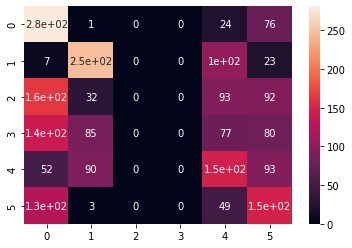

In [ ]:
heatmap(confusion_matrix(labels_test,pred_test),annot=True)

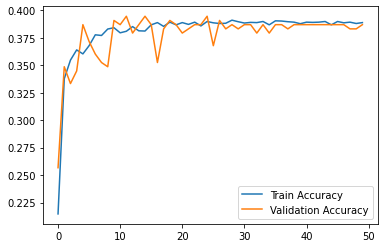

In [ ]:
plt.plot(range(0,epoch),accuracy_train)
plt.plot(range(0,epoch),accuracy_validation)
plt.legend(["Train Accuracy", "Validation Accuracy"])

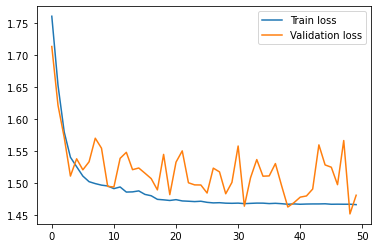

In [ ]:
plt.plot(range(0,epoch),training_loss)
plt.plot(range(0,epoch),val_loss)
plt.legend(["Train loss", "Validation loss"])

## **2nd Model  1D**

In [ ]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.conv1 = nn.Conv1d(in_channels = 1 ,out_channels = 1024 , kernel_size = 7, stride = 5)    
        self.conv2 = nn.Conv1d(in_channels = 1024 ,out_channels = 2048 , kernel_size = 7, stride = 5)
        self.conv3 = nn.Conv1d(in_channels = 2048 ,out_channels = 1024 , kernel_size = 7, stride = 5)
        self.fc1 = nn.Linear(1024 , 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 6)
        self.batchnorm = nn.BatchNorm1d(1024)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool1d(input=x,kernel_size=7)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool1d(input=x,kernel_size=7)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool1d(input=x,kernel_size=7)
        x = F.relu(x)
        x = self.batchnorm(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
# If GPU available: set Device to GPU
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

In [ ]:
model=Model1()
# Move model to GPU
model.to(device)
training_loss=[]
val_loss=[]
test_loss=[]
accuracy_train=[]
accuracy_validation=[]
accuracy_test=[]

epoch = 20

optimizer = torch.optim.Adam(model.parameters(), 0.00001, weight_decay=.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=.3, threshold=1e-4)

for e in range(epoch):
  labels_train,pred_train,loss_train=run_model(model,train_dataloader,device, optimizer)
  labels_validation,pred_validation,loss_validation=run_model(model,validation_dataloader,device, optimizer,train=False)
  training_loss.append(loss_train)
  val_loss.append(loss_validation)
  print("Epoch",e+1,":")
  accuracy_train_temp=printing_accuracy_classification_report(labels_train,pred_train,loss_train,0)
  accuracy_train.append(accuracy_train_temp)
  accuracy_v=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1)
  accuracy_validation.append(accuracy_v)
  scheduler.step(loss_validation)

accuracy_temp=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1,1)
labels_test,pred_test,loss_test=run_model(model,test_dataloader,device,optimizer,train=False)  
accuracy_t=printing_accuracy_classification_report(labels_test,pred_test,loss_test,2,1)
accuracy_test.append(accuracy_t)
test_loss.append(loss_test)
#Bring Model Back to CPU
model = model.cpu()
# Clear GPU Cache
torch.cuda.empty_cache()

Epoch 1 :
Train:
loss 1.6475220103417674
accuracy: 0.3191188358932902
----------------------------------------------------------------
Validation:
loss 1.581806739171346
accuracy: 0.3563218390804598
----------------------------------------------------------------
Epoch 2 :
Train:
loss 1.5320996607503583
accuracy: 0.37206952303961194
----------------------------------------------------------------
Validation:
loss 1.5101503398683336
accuracy: 0.3793103448275862
----------------------------------------------------------------
Epoch 3 :
Train:
loss 1.486178473503359
accuracy: 0.39005658852061437
----------------------------------------------------------------
Validation:
loss 1.5137298504511516
accuracy: 0.3448275862068966
----------------------------------------------------------------
Epoch 4 :
Train:
loss 1.456759508963554
accuracy: 0.4035974130962005
----------------------------------------------------------------
Validation:
loss 1.5147149827745225
accuracy: 0.38697318007662834
-----

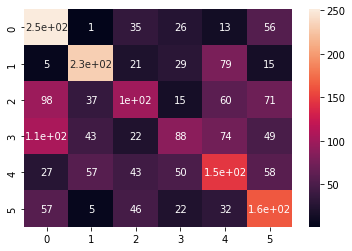

In [ ]:
heatmap(confusion_matrix(labels_test,pred_test),annot=True)

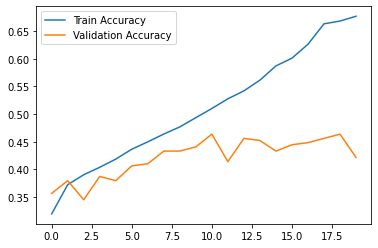

In [ ]:
plt.plot(range(0,epoch),accuracy_train)
plt.plot(range(0,epoch),accuracy_validation)
plt.legend(["Train Accuracy", "Validation Accuracy"])

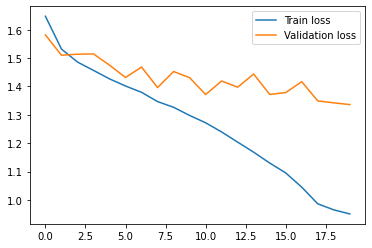

In [ ]:
plt.plot(range(0,epoch),training_loss)
plt.plot(range(0,epoch),val_loss)
plt.legend(["Train loss", "Validation loss"])

# **2D Model**

### Features

In [ ]:
def get_features_2D(audio_data,sample_rate):
  #default values
  mel_Spec=librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
  norm = np.linalg.norm(mel_Spec)
  normal_array = mel_Spec/norm
  return mel_Spec,normal_array

In [ ]:
def fix_audio_size(audio):
  standard_size=4*22050
  zeros_count=standard_size-len(audio)
  if zeros_count<0:
    #del audio[standard_size:]
    return audio[:standard_size]
  audio=np.append(audio,np.zeros(zeros_count))
  return audio

In [ ]:
specto_data=[]
specto_data_normalized=[]
for j in range(0,len(Crema_df.Path)):
    temp_audio, sample_rate = librosa.load(Crema_df.Path[j])
    audio=fix_audio_size(temp_audio)
    mel_Spec,norm=get_features_2D(audio,sample_rate)
    specto_data.append(mel_Spec)
    specto_data_normalized.append(norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


### Saving 2d features Array & Labels in drive

In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2DFeatures.npy',specto_data)

In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2DFeatures_normalized.npy',specto_data_normalized)

In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2DLabels.npy',np.array(Crema_df.Emotions))

In [ ]:
del specto_data
del specto_data_normalized

### loading 2d features Array & Labels from drive

In [ ]:
specto_data = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2DFeatures.npy',allow_pickle=True)

In [ ]:
specto_data_normalized = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2DFeatures_normalized.npy',allow_pickle=True)

In [ ]:
labels = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2DLabels.npy',allow_pickle=True)

### Spliting Data 

In [ ]:
data_temp, data_test, labels_temp, labels_test = train_test_split(specto_data,labels, test_size=0.3, random_state=1 , stratify = labels)

In [ ]:
data_train, data_validation, labels_train, labels_validation = train_test_split(data_temp,labels_temp, test_size=0.05, random_state=1 , stratify = labels_temp)

### Saving Labels & data of test , train , validation in drive

In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/data.npy',data_test)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/labels.npy',labels_test)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/data.npy',data_train)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/labels.npy',labels_train)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/data.npy',data_validation)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/labels.npy',labels_validation)

In [ ]:
del data_test
del labels_test
del data_train
del labels_train
del data_validation
del labels_validation

### Loading Labels & data of test , train , validation from drive

In [ ]:
data_test = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/data.npy',allow_pickle=True)
labels_test = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/labels.npy',allow_pickle=True)
data_train = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/data.npy',allow_pickle=True)
labels_train = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/labels.npy',allow_pickle=True)
data_validation = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/data.npy',allow_pickle=True)
labels_validation = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/labels.npy',allow_pickle=True)

### Spliting Data normalized

In [ ]:
data_temp_normalized, data_test_normalized, labels_temp_normalized, labels_test_normalized = train_test_split(specto_data_normalized,labels, test_size=0.3, random_state=1 , stratify = labels)

In [ ]:
data_train_normalized, data_validation_normalized, labels_train_normalized, labels_validation_normalized = train_test_split(data_temp_normalized,labels_temp_normalized, test_size=0.05, random_state=1 , stratify = labels_temp_normalized)

### Saving Labels & data of test , train , validation in drive (normalized)

In [ ]:
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/data_normalized.npy',data_test_normalized)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/labels_normalized.npy',labels_test_normalized)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/data_normalized.npy',data_train_normalized)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/labels_normalized.npy',labels_train_normalized)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/data_normalized.npy',data_validation_normalized)
np.save('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/labels_normalized.npy',labels_validation_normalized)

In [ ]:
del data_test_normalized
del labels_test_normalized
del data_train_normalized
del labels_train_normalized
del data_validation_normalized
del labels_validation_normalized

### Loading Labels & data of test , train , validation from drive (normalized)

In [ ]:
data_test_normalized = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/data_normalized.npy',allow_pickle=True)
labels_test_normalized = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Test/labels_normalized.npy',allow_pickle=True)
data_train_normalized = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/data_normalized.npy',allow_pickle=True)
labels_train_normalized = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Train/labels_normalized.npy',allow_pickle=True)
data_validation_normalized = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/data_normalized.npy',allow_pickle=True)
labels_validation_normalized = np.load('/content/gdrive/MyDrive/Project 3 SER/Data/2D Validate/labels_normalized.npy',allow_pickle=True)

### DataLoader

In [ ]:
class my_2d_Dataset(Dataset):
  def __init__(self, array,label):
    self.array = array
    self.label = label
      
      
  def __getitem__(self, index):
      mel_Spec=self.array[index]
      return tensor(mel_Spec).float(),tensor(int(self.label[index])) 

  def __len__(self):
      return len(self.array) 

In [ ]:
custom_2d_val_Dataset=my_2d_Dataset(data_validation,labels_validation)
custom_2d_train_Dataset=my_2d_Dataset(data_train,labels_train)
custom_2d_test_Dataset=my_2d_Dataset(data_test,labels_test)

In [ ]:
validation_2d_dataloader = DataLoader(custom_2d_val_Dataset, batch_size=128,shuffle=True, num_workers=0)
train_2d_dataloader = DataLoader(custom_2d_train_Dataset, batch_size=128,shuffle=True, num_workers=0)
test_2d_dataloader = DataLoader(custom_2d_test_Dataset, batch_size=128,shuffle=True, num_workers=0)

### DataLoader (normalized)

In [ ]:
class my_2d_Dataset(Dataset):
  def __init__(self, array,label):
    self.array = array
    self.label = label
      
      
  def __getitem__(self, index):
      mel_Spec=self.array[index]
      return tensor(mel_Spec).float(),tensor(int(self.label[index])) 

  def __len__(self):
      return len(self.array) 

In [ ]:
custom_2d_val_Dataset_normalized=my_2d_Dataset(data_validation_normalized,labels_validation_normalized)
custom_2d_train_Dataset_normalized=my_2d_Dataset(data_train_normalized,labels_train_normalized)
custom_2d_test_Dataset_normalized=my_2d_Dataset(data_test_normalized,labels_test_normalized)

In [ ]:
validation_2d_dataloader_normalized = DataLoader(custom_2d_val_Dataset_normalized, batch_size=128,shuffle=True, num_workers=0)
train_2d_dataloader_normalized = DataLoader(custom_2d_train_Dataset_normalized, batch_size=128,shuffle=True, num_workers=0)
test_2d_dataloader_normalized = DataLoader(custom_2d_test_Dataset_normalized, batch_size=128,shuffle=True, num_workers=0)

### Run model function

In [ ]:
def run_2d_model(model,dataloader, optimizer,train = True ):

  if train:
    model.train()
  
  pred = []
  labels = []
  loss = nn.CrossEntropyLoss()

  total_loss = 0
  for (data, label) in dataloader:
    data = data.unsqueeze_(0).permute(1,0,2,3)
    

    # move data and label tensors to GPU
    data, label = data.to(device), label.to(device)

    output = model(data)

    loss_ = loss(output,label)
    total_loss += loss_.item()
    if train:
      optimizer.zero_grad()
      loss_.backward()
      optimizer.step()


    temp=torch.argmax(output,dim=1)
    pred += temp.tolist()
    labels += label.tolist()

    # bring data and label tensors from GPU
    del(data)
    del(label)
    # Clear GPU Cache
    torch.cuda.empty_cache()

  return labels,pred,total_loss/len(dataloader)

### 1st Model  2D

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(333312, 128)
        self.fc2 = nn.Linear(128, 10)
        self.batchnorm = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.batchnorm(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
# If GPU available: set Device to GPU
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [ ]:
model=Model()
# Move model to GPU
model.to(device)
training_loss=[]
val_loss=[]
test_loss=[]
accuracy_train=[]
accuracy_validation=[]
accuracy_test=[]

epoch = 50

optimizer = torch.optim.Adam(model.parameters(), 0.00001, weight_decay=.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=.3, threshold=1e-4)

for e in range(epoch):
  labels_train,pred_train,loss_train=run_2d_model(model,train_2d_dataloader,optimizer)
  labels_validation,pred_validation,loss_validation=run_2d_model(model,validation_2d_dataloader,optimizer,train=False)
  training_loss.append(loss_train)
  val_loss.append(loss_validation)
  print("Epoch",e+1,":")
  accuracy_train_temp=printing_accuracy_classification_report(labels_train,pred_train,loss_train,0)
  accuracy_train.append(accuracy_train_temp)
  accuracy_v=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1)
  accuracy_validation.append(accuracy_v)
  scheduler.step(loss_validation)

accuracy_temp=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1,1)
labels_test,pred_test,loss_test=run_2d_model(model,test_2d_dataloader,optimizer,train=False)  
accuracy_t=printing_accuracy_classification_report(labels_test,pred_test,loss_test,2,1)
accuracy_test.append(accuracy_t)
test_loss.append(loss_test)
#Bring Model Back to CPU
model = model.cpu()
# Clear GPU Cache
torch.cuda.empty_cache()

Epoch 1 :
Train:
loss 1.8873831186539087
accuracy: 0.26919967663702504
----------------------------------------------------------------
Validation:
loss 1.8652463754018147
accuracy: 0.2835249042145594
----------------------------------------------------------------
Epoch 2 :
Train:
loss 1.6999339843407655
accuracy: 0.29931285367825383
----------------------------------------------------------------
Validation:
loss 2.2106037934621177
accuracy: 0.30268199233716475
----------------------------------------------------------------
Epoch 3 :
Train:
loss 1.6260732076106927
accuracy: 0.33023443815683107
----------------------------------------------------------------
Validation:
loss 2.295970877011617
accuracy: 0.31417624521072796
----------------------------------------------------------------
Epoch 4 :
Train:
loss 1.586276005475949
accuracy: 0.3470088924818108
----------------------------------------------------------------
Validation:
loss 2.1877687772115073
accuracy: 0.3218390804597701
--

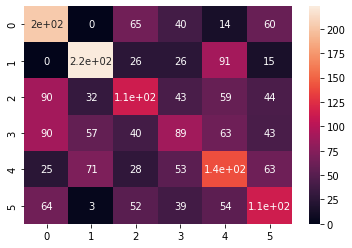

In [ ]:
heatmap(confusion_matrix(labels_test,pred_test),annot=True)

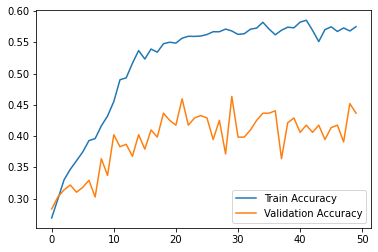

In [ ]:
plt.plot(range(0,epoch),accuracy_train)
plt.plot(range(0,epoch),accuracy_validation)
plt.legend(["Train Accuracy", "Validation Accuracy"])

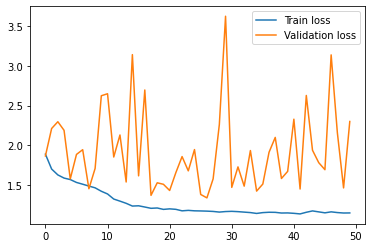

In [ ]:
plt.plot(range(0,epoch),training_loss)
plt.plot(range(0,epoch),val_loss)
plt.legend(["Train loss", "Validation loss"])

### 2nd Model 2D

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, 1)
        self.conv2 = nn.Conv2d(128, 128, 3, 1)
        self.conv3 = nn.Conv2d(128, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(324032, 128)
        self.fc2 = nn.Linear(128, 10)
        self.batchnorm = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.batchnorm(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
# If GPU available: set Device to GPU
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(device)

cuda


In [ ]:
model=Model()
# Move model to GPU
model.to(device)
training_loss=[]
val_loss=[]
test_loss=[]
accuracy_train=[]
accuracy_validation=[]
accuracy_test=[]

epoch = 50

optimizer = torch.optim.Adam(model.parameters(), 0.00001, weight_decay=.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=.3, threshold=1e-4)

for e in range(epoch):
  labels_train,pred_train,loss_train=run_2d_model(model,train_2d_dataloader,optimizer)
  labels_validation,pred_validation,loss_validation=run_2d_model(model,validation_2d_dataloader,optimizer,train=False)
  training_loss.append(loss_train)
  val_loss.append(loss_validation)
  print("Epoch",e+1,":")
  accuracy_train_temp=printing_accuracy_classification_report(labels_train,pred_train,loss_train,0)
  accuracy_train.append(accuracy_train_temp)
  accuracy_v=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1)
  accuracy_validation.append(accuracy_v)
  scheduler.step(loss_validation)

accuracy_temp=printing_accuracy_classification_report(labels_validation,pred_validation,loss_validation,1,1)
labels_test,pred_test,loss_test=run_2d_model(model,test_2d_dataloader,optimizer,train=False)  
accuracy_t=printing_accuracy_classification_report(labels_test,pred_test,loss_test,2,1)
accuracy_test.append(accuracy_t)
test_loss.append(loss_test)
#Bring Model Back to CPU
model = model.cpu()
# Clear GPU Cache
torch.cuda.empty_cache()

Epoch 1 :
Train:
loss 1.8935089447559454
accuracy: 0.2641471301535974
----------------------------------------------------------------
Validation:
loss 2.290636579195658
accuracy: 0.24521072796934865
----------------------------------------------------------------
Epoch 2 :
Train:
loss 1.703908397601201
accuracy: 0.3003233629749394
----------------------------------------------------------------
Validation:
loss 1.5786902904510498
accuracy: 0.2835249042145594
----------------------------------------------------------------
Epoch 3 :
Train:
loss 1.6633896002402673
accuracy: 0.32457558609539205
----------------------------------------------------------------
Validation:
loss 1.6808102130889893
accuracy: 0.3218390804597701
----------------------------------------------------------------
Epoch 4 :
Train:
loss 1.6167255212099125
accuracy: 0.3455941794664511
----------------------------------------------------------------
Validation:
loss 1.7100390593210857
accuracy: 0.32950191570881227
----

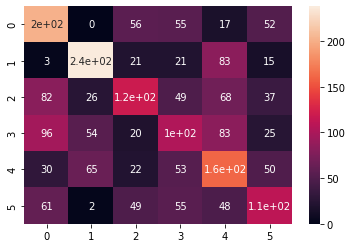

In [ ]:
heatmap(confusion_matrix(labels_test,pred_test),annot=True)

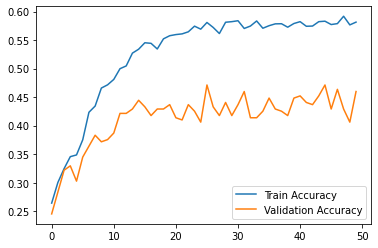

In [ ]:
plt.plot(range(0,epoch),accuracy_train)
plt.plot(range(0,epoch),accuracy_validation)
plt.legend(["Train Accuracy", "Validation Accuracy"])

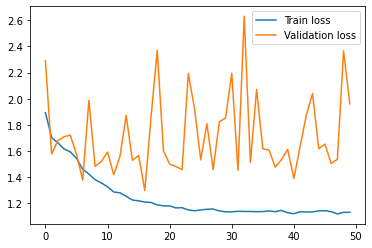

In [ ]:
plt.plot(range(0,epoch),training_loss)
plt.plot(range(0,epoch),val_loss)
plt.legend(["Train loss", "Validation loss"])